# 19002065
# Jaime Ariel Chitay Bautista

### Objetivo

Se implementará un modelo de redes neuronales recurrentes para modelar la evolución de la Deuda pública en guatemala, la información está dada en Millones de quetzales y se utilizará el método de ventanas para modelar la secuencia de valores de la Deuda pública.


### Explicación
Se proporcionará información de la Deuda pública de Guatemala. El estado acude a una Deuda pública cuando no puede pagar los gastos e inversiones actuales, por el desfase que hay en las cuentas públicas.

#### Fuente: Banco de Guatemala.	
NOTA: De 1995-2009 el saldo de la deuda pública interna bonificada incluye bonos del tesoro negociados en dólares estadounidense en el mercado nacional valuados al tipo de cambio de referencia del día de las negociaciones. A partir de 2010 valuados al tipo de cambio de referencia al último día del mes correspondiente.

Link:
https://www.banguat.gob.gt/inc/ver.asp?id=/imm/imm54&e=114910&e=152742

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_name_1 = 'Deuda_publica.xls'
dataset_anual= pd.read_excel(file_name_1)
dataset_anual

,Date,Price
0,1995-01-01,4400.400000
1,1995-02-01,4551.000000
2,1995-03-01,4686.500000
3,1995-04-01,4697.600000
4,1995-05-01,4527.000000
5,1995-06-01,4377.700000
6,1995-07-01,4631.700000
7,1995-08-01,4826.900000
8,1995-09-01,4899.700000
9,1995-10-01,4610.200000


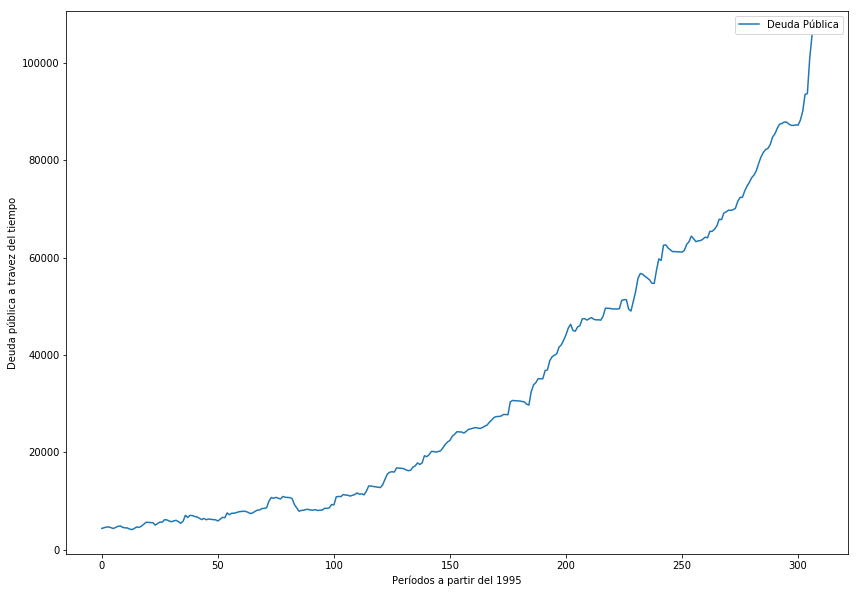

In [11]:
plt.figure(figsize=(14,10))
plt.plot(dataset_anual["Price"], label="Deuda Pública")
plt.xlabel("Períodos a partir del 1995")
plt.ylabel("Deuda pública a travez del tiempo")
plt.legend();

# Gráfica de la serie en el tiempo

In [12]:
dataset = dataset_anual.rename(columns={'Date':'Fecha','Price': 'Precio de deuda'})
dataset['Fecha'] = pd.to_datetime(dataset['Fecha']) #cambiar formato de fecha para que lo reconozca pandas
dataset.tail()

,Fecha,Precio de deuda
302,2020-03-01,90033.324770
303,2020-04-01,93482.767411
304,2020-05-01,93650.850175
305,2020-06-01,100852.860977
306,2020-07-01,105591.864634


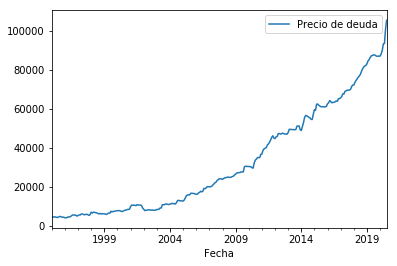

In [13]:
serie = dataset.copy()
graf = serie.set_index(["Fecha"], drop=True)
graf.plot()
plt.show()

# Normalización de datos

In [15]:
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(dataset_anual['Price'].values.reshape(-1,1))
new_data_anual = pd.DataFrame(data,columns=['Deuda Publica'])
new_data_anual.head()

,Deuda Publica
0,0.002387
1,0.003871
2,0.005207
3,0.005317
4,0.003635


In [17]:
lookback = 10 
X, Y = [], []
for i in range(len(dataset_anual)-lookback-1):
	a = data[i:(i+lookback), 0]
	X.append(a)
	Y.append(data[i + lookback, 0])

In [18]:
def RNN(X,Y):
  X_train = np.array(X)
  y_train = np.array(Y)
  train_size = int(len(dataset_anual) * 0.7) 
  test_size = len(dataset_anual) - train_size
  X_test = X_train[:test_size+lookback]
  x_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
  x_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
  model = Sequential()
  model.add(LSTM(30, return_sequences= True, input_shape=(x_train.shape[1],10)))
  model.add(LSTM(30, return_sequences=True))
  model.add(LSTM(30))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mean_squared_error')
  model.fit(x_train, y_train, epochs=200, batch_size=32)
  prediccion = model.predict(x_test) 
  model.summary()
  return prediccion, test_size

In [19]:
prediccion, test_size = RNN(X,Y)

Epoch 1/200
296/296 [==============================] - 3s 10ms/step - loss: 0.1409
Epoch 2/200
296/296 [==============================] - 0s 250us/step - loss: 0.1215
Epoch 3/200
296/296 [==============================] - ETA: 0s - loss: 0.095 - 0s 260us/step - loss: 0.0973
Epoch 4/200
296/296 [==============================] - 0s 233us/step - loss: 0.0694
Epoch 5/200
296/296 [==============================] - 0s 199us/step - loss: 0.0354
Epoch 6/200
296/296 [==============================] - 0s 257us/step - loss: 0.0218
Epoch 7/200
296/296 [==============================] - 0s 243us/step - loss: 0.0165
Epoch 8/200
296/296 [==============================] - 0s 250us/step - loss: 0.0097
Epoch 9/200
296/296 [==============================] - 0s 263us/step - loss: 0.0055
Epoch 10/200
296/296 [==============================] - 0s 257us/step - loss: 0.0031
Epoch 11/200
296/296 [==============================] - 0s 267us/step - loss: 0.0019
Epoch 12/200
296/296 [=============================

296/296 [==============================] - 0s 203us/step - loss: 2.8590e-04
Epoch 94/200
296/296 [==============================] - 0s 216us/step - loss: 2.5152e-04
Epoch 95/200
296/296 [==============================] - 0s 209us/step - loss: 2.6194e-04
Epoch 96/200
296/296 [==============================] - 0s 240us/step - loss: 2.6230e-04
Epoch 97/200
296/296 [==============================] - 0s 206us/step - loss: 2.4913e-04
Epoch 98/200
296/296 [==============================] - 0s 206us/step - loss: 2.4212e-04
Epoch 99/200
296/296 [==============================] - 0s 260us/step - loss: 2.4868e-04
Epoch 100/200
296/296 [==============================] - 0s 236us/step - loss: 2.6181e-04
Epoch 101/200
296/296 [==============================] - 0s 243us/step - loss: 2.4461e-04
Epoch 102/200
296/296 [==============================] - 0s 236us/step - loss: 2.4380e-04
Epoch 103/200
296/296 [==============================] - 0s 223us/step - loss: 2.4622e-04
Epoch 104/200
296/296 [=======

296/296 [==============================] - 0s 196us/step - loss: 1.8820e-04
Epoch 185/200
296/296 [==============================] - 0s 203us/step - loss: 1.8278e-04
Epoch 186/200
296/296 [==============================] - 0s 196us/step - loss: 1.8683e-04
Epoch 187/200
296/296 [==============================] - 0s 192us/step - loss: 1.7865e-04
Epoch 188/200
296/296 [==============================] - 0s 199us/step - loss: 1.8135e-04
Epoch 189/200
296/296 [==============================] - 0s 192us/step - loss: 1.9409e-04
Epoch 190/200
296/296 [==============================] - 0s 199us/step - loss: 1.9983e-04
Epoch 191/200
296/296 [==============================] - 0s 209us/step - loss: 1.8430e-04
Epoch 192/200
296/296 [==============================] - 0s 196us/step - loss: 1.8005e-04
Epoch 193/200
296/296 [==============================] - 0s 199us/step - loss: 1.7345e-04
Epoch 194/200
296/296 [==============================] - 0s 203us/step - loss: 2.0487e-04
Epoch 195/200
296/296 [=

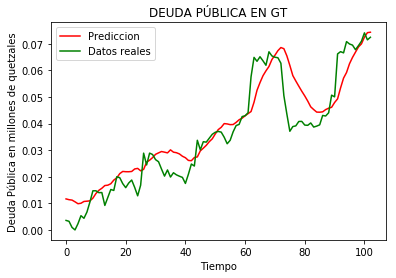

In [29]:
plt.plot(prediccion, color= 'red')
plt.plot(data[lookback:test_size+(2*lookback),0], color='green')
plt.title("DEUDA PÚBLICA EN GT")
plt.xlabel("Tiempo")
plt.ylabel("Deuda Pública en millones de quetzales")
plt.legend(['Prediccion', 'Datos reales'], loc='upper left')
plt.show()

## CONCLUSIÓNES:
En este caso, el modelo de redes neuronales recurrentes tiene un buen ajuste para el caso de la Deuda pública en GT, lo cual podría usarse esta clase de casos para pronósitcos a corto plazo.

Tal y como se aprendió, esta clase de modelos trabajan bien en la sección de series de tiempo.